In [1]:
# Tell Jupyter where to find the code
import os, sys
sys.path.append(os.environ['CODE']) #CODE is defined in the conda environment "Notes"
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('notebook')
import matplotlib.cm as cm

import Graphene
import fundamental_constants as fc

# The Nonretarded Problem

Description from [Christensen 2017, 5.3.1](http://link.springer.com/10.1007/978-3-319-48562-1):

In nanostructured graphene ($\mathbf r_{||}\in\Omega$ in the $xy$-plane), one may self-consitently couple Coulomb's law to the continuity equation for charge to find

$$
\phi(\mathbf r_{||})=\int_\Omega \frac{\rho_{||}(\mathbf r_{||}}{4\pi\epsilon_0\bar\epsilon|\mathbf{r_{||}-r'_{||}}|} d^2\mathbf r_{||} \\
\rho_{||}(\mathbf r_{||}) =i\omega^{-1}\nabla_{||}\cdot[\sigma(\mathbf r_{||},\omega)\nabla_{||}\phi(\mathbf r_{||})]
$$

Then the potential $\phi$ (or equivalently the charge density) can be decomposed into eigenstates $\left|\phi_\nu\right>$ with eigenvalues

$$
\zeta_\nu \phi_\nu(\mathbf r_{||})=\frac{-1}{2\pi}\int_{\bar\Omega} ... \\
\zeta_\nu = \frac{2 i \epsilon_0\bar\epsilon\omega_\nu L}{\sigma(\omega_\nu)}
$$

## Half Sheet

## Ribbon

<img src='images/christensen-thesis-2017-fig5-6.png' width='500px'/>

## Dipole Polarizibility

$$
\alpha(\omega) = 2L^3 \sum_\nu \frac{|\left<\tilde x|\rho_{||,\nu}\right>|^2}{\zeta_\nu - \zeta(\omega)}
$$

# `CrossSection`

In [ ]:
mlg_disk1 = Graphene.Disk(1,12.5e-9)
mlg_disk2 = Graphene.Disk(1,25e-9)
mlg_disk3 = Graphene.Disk(1,50e-9)
mlg_disk4 = Graphene.Disk(1,100e-9)

omega = np.linspace(0.01,1,num=200)*fc.e_proton / fc.hbar
eF = 0.4 * fc.e_proton
gamma = 0.012*fc.e_proton / fc.hbar
T=300
eps_medium=1

absorption1 = mlg_disk1.CrossSection(omega,gamma,eF,T,1,'absorption')
absorption2 = mlg_disk2.CrossSection(omega,gamma,eF,T,1,'absorption')
absorption3 = mlg_disk3.CrossSection(omega,gamma,eF,T,1,'absorption')
absorption4 = mlg_disk4.CrossSection(omega,gamma,eF,T,1,'absorption')

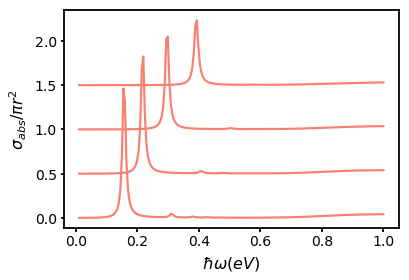

In [13]:
plt.plot(omega*fc.hbar/fc.e_proton,absorption1/(fc.pi*mlg_disk1.size**2)+1.5,color='salmon')
plt.plot(omega*fc.hbar/fc.e_proton,absorption2/(fc.pi*mlg_disk2.size**2)+1.0,color='salmon')
plt.plot(omega*fc.hbar/fc.e_proton,absorption3/(fc.pi*mlg_disk3.size**2)+0.5,color='salmon')
plt.plot(omega*fc.hbar/fc.e_proton,absorption4/(fc.pi*mlg_disk4.size**2)+0.0,color='salmon')

plt.xlabel('$\hbar\omega (eV)$')
plt.ylabel('$\sigma_{abs}/\pi r^2$')
plt.show()

<img src='images/christensen-thesis-2017-fig5-8.png' width='500px'/>

# Bounds on Optical Response

[Miller et al. 2017](http://pubs.acs.org/doi/10.1021/acs.nanolett.7b02007) describes what is possible for the optical response of various 2D materials. They find that for a 2D scatterer with local conductivity $\overleftrightarrow\sigma(\omega)$, the optical response is bounded by, what they entitle, a *material figure or merit* given by

$$
\text{Material FOM:   }F=Z_0||\overleftrightarrow\sigma^\dagger(\text{Re}[\overleftrightarrow\sigma])^{-1}\overleftrightarrow\sigma||_2
$$

where  $||.||_2$ is the *induced matrix 2-norm*. The cross sections $\sigma_\alpha$ are found to be bounded by
$$
\boxed{
    \sigma_{sca}/A \leq \frac{1}{4}F\\
    \sigma_{abs}/A \leq  F\\
    \sigma_{ext}/A \leq  F\\
}
$$


They identify graphene as one of the best in the mid-infrared and optical region of the EM spectrum (along with silver). Here, we attempt to replicate their results for graphene using the `Graphene.Nanostructure` class. For comparisons to other materials, see [this notebook] 

(They don't explicitly state the parameters used in Figure 1, but in later calculations, they use $T=300$ K and $\gamma$=($10^{12}$ eV/s)/$\epsilon_F$. Using those parameters, our results match)

In [2]:
mlg_nano = graphene.Nanostructure(1)

eF = 0.6*fc.e_proton
omega = np.linspace(.1,2,num=100)*fc.e_proton /fc.hbar
gamma = lambda eF: 10**12 * fc.e_proton / eF
T=300

bound_gr_high = mlg_nano.OpticalResponseBound(omega,gamma(0.6*fc.e_proton),0.6*fc.e_proton,T)
bound_gr_mid = mlg_nano.OpticalResponseBound(omega,gamma(0.4*fc.e_proton),0.4*fc.e_proton,T)
bound_gr_low = mlg_nano.OpticalResponseBound(omega,gamma(0.2*fc.e_proton),0.2*fc.e_proton,T)

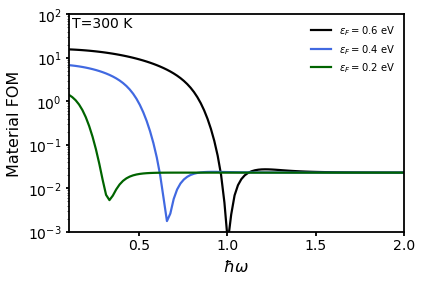

In [15]:
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_high,color='black',label='$\epsilon_F=0.6$ eV')
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_mid,color='royalblue',label='$\epsilon_F=0.4$ eV')
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_low,color='darkgreen',label='$\epsilon_F=0.2$ eV')
plt.xlabel('$\hbar\omega$')
plt.ylabel('Material FOM')
plt.ylim(1e-3,1e2)
plt.xlim(0.1,2)
plt.text(0.12,5*10**1,'T=%d K' %(T),fontsize=14)
plt.legend()
plt.show()

<img src='images/miller-limits-2017-fig1.png' width='400px'/>

## Exploring Bounds on Optical Properties

At higher temperatures (600 K) the optical reponse of graphene does not diminish much. However, this does not take into account phonons or hydrodynamic effects, which may be needed at these temperatures

In [14]:
mlg_nano = graphene.Nanostructure(1)

In [36]:
eF = 0.6*fc.e_proton
omega = np.linspace(.1,2,num=100)*fc.e_proton /fc.hbar
gamma = lambda eF: 10**12 * fc.e_proton / eF
T=600

bound_gr_high = mlg_nano.OpticalResponseBound(omega,gamma(0.6*fc.e_proton),0.6*fc.e_proton,T)
bound_gr_mid = mlg_nano.OpticalResponseBound(omega,gamma(0.4*fc.e_proton),0.4*fc.e_proton,T)
bound_gr_low = mlg_nano.OpticalResponseBound(omega,gamma(0.2*fc.e_proton),0.2*fc.e_proton,T)

In [ ]:
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_high,color='black')
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_mid,color='black')
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_low,color='black')
plt.xlabel('$\hbar\omega$')
plt.ylabel('Material FOM')
plt.ylim(1e-3,1e2)
plt.xlim(0.1,2)
plt.show()

# Nanoribbons

> An error exists in the specification of the Green function employed in Ref 6. We indicate the correct form here: for the width-normalized momenta $q$ and coordinates $x$, it *should* read $G(x,x')=\frac{1}{2q}\left\{ e^{-q|x-x'|} + \frac{e^{-q}\cosh[q(x-x')]+\cosh[q(x+x')]}{\sinh q} \right\}$
as derivable from a minor extension of the half sheet result [7]

In [ ]:
s